In [1]:
path = r"I:\2020_07_17_TS\*.wav"
# filename = r"\S4A02746_20000104_124448.wav"
# file = path + filename
from glob import glob 

In [2]:
filelist = glob(path)
filelist

['I:\\2020_07_17_TS\\1652_AI0_chirp_half_ms_with_target.wav',
 'I:\\2020_07_17_TS\\1706_AI0_chirp_one_ms_with_target.wav',
 'I:\\2020_07_17_TS\\1723_AI1_chirp_one_ms_without_target.wav',
 'I:\\2020_07_17_TS\\1723_AI0_chirp_one_ms_without_target.wav',
 'I:\\2020_07_17_TS\\1734_AI1_chirp_half_ms_without_target.wav',
 'I:\\2020_07_17_TS\\1734_AI0_chirp_half_ms_without_target.wav',
 'I:\\2020_07_17_TS\\1748_AI0_chirp_half_ms_nothing.wav',
 'I:\\2020_07_17_TS\\1753_AI0_chirp_half_ms_nothing.wav',
 'I:\\2020_07_17_TS\\1757_AI0_NL.wav']

In [3]:
# from scipy.io import wavfile (do not support 24bits depth)
import soundfile as sf
import numpy as np
import matplotlib.pyplot as plt
import math
# %matplotlib notebook
import os

In [4]:
class SL():
    def __init__(self, file):
        self.file = file
        self.bits = 24
        self.range = 2
        title = self.file.split('\\')[-1].split('.')[0].split('_')
        self.plot_title = title[1] + "_" + title[2]
        self.freq = title[2]
        print("title: {}".format(self.plot_title))
    def readWavFileToArray(self):
#         fp = open(self.file, 'r')
#         self.fs, self.values = wavfile.read(self.file)
#         self.values = self.values*(self.range/pow(2,self.bits))
        self.values, self.fs = sf.read(self.file)
        self.values = self.values-np.mean(self.values)
        self.length = len(self.values)
        self.time = np.arange(self.length)/self.fs
        print("total lenght: {}, time duration: {}".
              format(self.length, self.length//self.fs))
    def plot(self):
        plt.plot(self.time, self.values)
        plt.title(self.plot_title)
    def findPeakIndex(self, threshold):
        mask = ((self.values[1:-1]-self.values[2:])>0)*((self.values[1:-1]-self.values[:-2])>0)*(self.values[1:-1]>threshold)
        self.indexs = []
        for index, i in enumerate(mask):
            if(i):
                self.indexs.append(index+1)
        count=1
        self.indexs = np.array(self.indexs)
        diff = self.indexs[1:]-self.indexs[:-1]
        
        start_skip=0
        end_skip=0
        self.category=[]
        self.category.append(self.indexs[start_skip])
        for index, value in enumerate(diff):
            if value>self.fs:
                count+=1
                self.category.append(self.indexs[index-end_skip])
                self.category.append(self.indexs[index+1+start_skip])
        self.category.append(self.indexs[-(1+end_skip)])
        print("total sound generated: {}".format(count))
    def plotWithPeak(self):
        fig, ax = plt.subplots()
        ax.plot(self.time, self.values)
        ax.plot(self.time[self.indexs], self.values[self.indexs], 'o')
        ax.set_title(self.plot_title)
        fig.tight_layout()
    def plotWithFilterPeak(self):
        fig, ax = plt.subplots()
        ax.plot(self.time, self.values)
        ax.plot(self.time[self.category], self.values[self.category], 'o')
        ax.set_title(self.plot_title)
        fig.tight_layout()
    
    def rms(self, x):
        return np.sqrt(np.mean(x*x))
    def calculateSL(self):
        self.sen = -207
        length = len(self.category)
        print()
        if (length%2==0 and length>0):
            self.SL=[]
            for i in range(length//2):
                start = self.category[2*i]
                end = self.category[2*i+1]
                v = self.rms(self.values[start:end])
                sl = 20*math.log10(v)-self.sen
                self.SL.append(sl)
        else:
            print("the peak is wrong or empty, check the plot with peak")
    def getSL(self):
        return self.SL
    def getData(self):
        return self.values
    def getIndex(self):
        return self.indexs
    def getTime(self):
        return self.time

In [5]:
filelist

['I:\\2020_07_17_TS\\1652_AI0_chirp_half_ms_with_target.wav',
 'I:\\2020_07_17_TS\\1706_AI0_chirp_one_ms_with_target.wav',
 'I:\\2020_07_17_TS\\1723_AI1_chirp_one_ms_without_target.wav',
 'I:\\2020_07_17_TS\\1723_AI0_chirp_one_ms_without_target.wav',
 'I:\\2020_07_17_TS\\1734_AI1_chirp_half_ms_without_target.wav',
 'I:\\2020_07_17_TS\\1734_AI0_chirp_half_ms_without_target.wav',
 'I:\\2020_07_17_TS\\1748_AI0_chirp_half_ms_nothing.wav',
 'I:\\2020_07_17_TS\\1753_AI0_chirp_half_ms_nothing.wav',
 'I:\\2020_07_17_TS\\1757_AI0_NL.wav']

In [6]:
tank = SL(filelist[3])
tank.readWavFileToArray()
# tank.plot()

title: AI0_chirp
total lenght: 66975000, time duration: 654


In [7]:
tank.findPeakIndex(0.25)
# tank.plotWithPeak()
# b.calculateSL()

total sound generated: 215


In [8]:
index_tank = tank.getIndex()
data_tank = tank.getData()

In [9]:
target = SL(filelist[1])
target.readWavFileToArray()
# target.plot()

title: AI0_chirp
total lenght: 65200000, time duration: 636


In [10]:
target.findPeakIndex(0.25)
# target.plotWithPeak()
# b.calculateSL()

total sound generated: 210


In [11]:
index_target = target.getIndex()
data_target = target.getData()

In [15]:
fs = 102400
start_tank = index_tank[0]-int(0.0005*fs)
end_tank = start_tank + int(fs*0.001)
start_target = index_target[0]-int(0.0005*fs)
end_target = start_target + int(fs*0.001)

template = data_tank[start_tank:end_tank]
single_tank = data_tank[start_tank:end_tank]
single_target = data_target[start_target:end_target]

os_path = r"G:\python_work\03_target_strength\fig\2020_07_17"
os.chdir(os_path)

for i in range(200):
    start_tank = int(index_tank[i]-0.0005*fs)
    end_tank = int(start_tank + fs*0.001)
    
    
    tank = data_tank[start_tank:end_tank]
    fig, ax = plt.subplots()
    time = np.arange(len(tank))/fs
    ax.plot(time, tank)
    ax.set_title("chirp number {}".format(i))
    ax.set_xlabel("Time(s)")
    ax.set_ylabel("Voltage(v)")
    fig.savefig('index_{}.png'.format(i))
    plt.close()
    template = template + tank

In [13]:
len(index_target)

420

In [22]:
fs = 102400
start_tank = int(index_tank[0]-0.0005*fs)
end_tank = int(start_tank + fs*0.001)
start_target = int(index_target[0]-0.0005*fs)
end_target = int(start_target + fs*0.001)

template = data_tank[start_tank:end_tank]
single_tank = data_tank[start_tank:end_tank]
single_target = data_target[start_target:end_target]

os_path = r"G:\python_work\03_target_strength\fig\2020_07_07"
os.chdir(os_path)

for i in range(287):
    start_target = int(index_target[i]-0.0005*fs)
    end_target = int(start_target + fs*0.001)
    
    
    tank = data_target[start_target:end_target]
    fig, ax = plt.subplots()
    time = np.arange(len(tank))/fs
    ax.plot(time, tank)
    ax.set_title("chirp number {}".format(i+189))
    ax.set_xlabel("Time(s)")
    ax.set_ylabel("Voltage(v)")
    fig.savefig('index_{}.png'.format(i+189))
    plt.close()
    template = template + tank

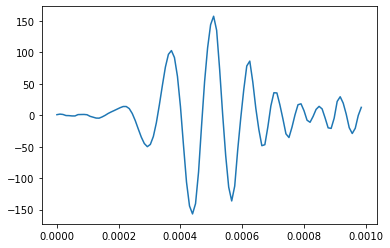

In [30]:
average = np.zeros(len(single_tank))
for i in range(len(index_target)):
    start_target = int(index_target[i]-0.0005*fs)
    end_target = int(start_target + fs*0.001)
    target = data_target[start_target:end_target]
    average = average + target
for i in range(len(index_tank)):
    start_tank = int(index_tank[i]-0.0005*fs)
    end_tank = int(start_tank + fs*0.001)
    tank = data_tank[start_tank:end_tank]
    average = average + target
fig, ax = plt.subplots()
time = np.arange(len(average))/fs
ax.plot(time, average)
average = average/476

In [31]:
power_list = []
for i in range(len(index_target)):
    start_target = int(index_target[i]-0.0005*fs)
    end_target = int(start_target + fs*0.001)
    target = data_target[start_target:end_target]
    diff = target-average
    power_list.append(np.sum(diff*diff))
for i in range(len(index_tank)):
    start_tank = int(index_tank[i]-0.0005*fs)
    end_tank = int(start_tank + fs*0.001)
    tank = data_tank[start_tank:end_tank]
    diff = tank - average
    power_list.append(np.sum(diff*diff))

In [32]:
len(power_list)

476

Text(0.25, 0.6, 'stdev=0.0279, mean=0.0297')

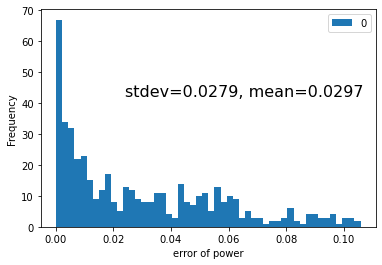

In [70]:
import pandas as pd
df = pd.DataFrame(power_list)
ax = df.plot.hist(bins=50)
ax.set_xlabel("error of power")
ax.text(0.25, 0.6, s="stdev=0.0279, mean=0.0297", transform=ax.transAxes, fontsize=16)

In [38]:
def rms(x):
    return np.sqrt(np.mean(x*x))

In [41]:
def compute_SL(x):
    sen = -207
    r = rms(x)
    sl = 20*math.log10(r)-sen
    return sl

In [42]:
sl_list = []
for i in range(len(index_target)):
    start_target = int(index_target[i]-0.0005*fs)
    end_target = int(start_target + fs*0.001)
    target = data_target[start_target:end_target]
    sl = compute_SL(target)
    sl_list.append(sl)
for i in range(len(index_tank)):
    start_tank = int(index_tank[i]-0.0005*fs)
    end_tank = int(start_tank + fs*0.001)
    tank = data_tank[start_tank:end_tank]
    sl = compute_SL(tank)
    sl_list.append(sl)

In [44]:
len(sl_list)

476

In [45]:
sl_list

[188.41435216315705,
 188.41208347259666,
 188.4305986385137,
 188.40589237543986,
 188.3985039345457,
 188.39659291252792,
 188.39284108914993,
 188.390411517964,
 188.38571695846423,
 188.38325289349063,
 188.3786583543565,
 188.3824935129788,
 188.37853509873273,
 188.3945874343056,
 188.37569634960633,
 188.36823893543743,
 188.3660160001015,
 188.36458340121285,
 188.36047646563716,
 188.35868162832327,
 188.35786353877933,
 188.35857521428818,
 188.38156611107001,
 188.35239434295116,
 188.34990251736525,
 188.3560890540186,
 188.3499281102336,
 188.34474244542244,
 188.3452146209382,
 188.3465415404007,
 188.3747041111348,
 188.34256791573054,
 188.33832280564235,
 188.3376314628648,
 188.33658837215356,
 188.33742397756936,
 188.33558538829624,
 188.34849568002866,
 188.33002252429105,
 188.3285198438177,
 188.3658406492493,
 188.3266225156142,
 188.32921092917542,
 188.3454081221951,
 188.32586808187,
 188.3229043256752,
 188.325536287583,
 188.32195298059048,
 188.32302816203

Text(0.3, 0.55, 'stdev=0.022, mean=188.311')

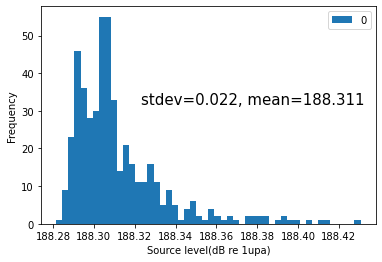

In [77]:
df = pd.DataFrame(sl_list)
ax = df.plot.hist(bins=50)
ax.set_xlabel("Source level(dB re 1upa)")
ax.text(0.3, 0.55, s="stdev=0.022, mean=188.311", transform=ax.transAxes, fontsize=15)

In [49]:
import statistics

In [50]:
statistics.stdev(sl_list)

0.022649358360817398

In [51]:
statistics.mean(sl_list)

188.3118296814865

In [63]:
statistics.stdev(power_list)

0.027896794709818054

In [64]:
statistics.mean(power_list)

0.02972755893976324